In [1]:

import pandas as pd
import json

In [2]:
# Load the JSONL file
file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame for easier analysis
df = pd.DataFrame(data)

# Display the first few rows, showing all columns
pd.set_option('display.max_columns', None)
df.head()

,datePublished,docSubType,docType,doi,fullText,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,volumeNumber,wordCount,creator,pageEnd,pageStart,pagination,abstract
0,1993-01-01,misc,article,10.2307/183062,[I Introducing... X KRONOS: Journal of Cape Hi...,http://www.jstor.org/stable/183062,"[{'name': 'doi', 'value': '10.2307/183062'}, {...",The Journal of African History,1,"[kronos, history, hmso publicity, social histo...",[eng],"[unigrams, bigrams, trigrams]",6,jstor,1993,Cambridge University Press,"[History, History, African Studies, Area Studies]","[Social sciences - Communications, Information...",Back Matter,http://www.jstor.org/stable/183062,34,1528,NaN,NaN,NaN,NaN,NaN
1,1972-01-01,book-review,article,10.2307/180596,[LEGON HISTORY SERIES Asante and its Nezghbour...,http://www.jstor.org/stable/180596,"[{'name': 'doi', 'value': '10.2307/180596'}, {...",The Journal of African History,3,"[asante, gold coast, legon history, protest mo...",[eng],"[unigrams, bigrams, trigrams]",3,jstor,1972,Cambridge University Press,"[African Studies, Area Studies, History, History]",[Philosophy - Applied philosophy],Legon History Series,http://www.jstor.org/stable/180596,13,1355,"[R. C. C. Law, J. K. Fynn, Francis Agbodeka]",518,516,pp. 516-518,NaN
2,2004-01-01,book-review,article,10.2307/4100485,[THE WRITTEN WORD AND THE COLONIAL ENCOUNTER D...,http://www.jstor.org/stable/4100485,"[{'name': 'doi', 'value': '10.2307/4100485'}, ...",The Journal of African History,2,"[colonial, hawkins, colonial rule, northwester...",[eng],"[unigrams, bigrams, trigrams]",2,jstor,2004,Cambridge University Press,"[African Studies, Area Studies, History, History]","[History - Historical methodology, Philosophy ...",The Written Word and the Colonial Encounter,http://www.jstor.org/stable/4100485,45,1018,"[Carola Lentz, Sean Hawkins]",339,338,pp. 338-339,NaN
3,2013-01-01,book-review,article,10.2307/43305140,"[444 I VOL. 54, NO. 3 REVIEWS ROMANTICIZING TR...",http://www.jstor.org/stable/43305140,"[{'name': 'doi', 'value': '10.2307/43305140'},...",The Journal of African History,3,"[manley, travel, deborah manley, century, bett...",[eng],"[unigrams, bigrams, trigrams]",2,jstor,2013,Cambridge University Press,"[History, History, African Studies, Area Studies]",[Arts - Literature],ROMANTICIZING TRAVEL IN A TIMELESS EGYPT,http://www.jstor.org/stable/43305140,54,871,"[ANNALISE J. K. DEVRIES, Deborah Manley]",445,444,pp. 444-445,NaN
4,1992-01-01,book-review,article,10.2307/183022,[NKRUMAH IN EXILE Kwame Nkrumah: The Conakry Y...,http://www.jstor.org/stable/183022,"[{'name': 'doi', 'value': '10.2307/183022'}, {...",The Journal of African History,2,"[nkrumahs, conakry, conakry years, kwame nkrum...",[eng],"[unigrams, bigrams, trigrams]",2,jstor,1992,Cambridge University Press,"[African Studies, Area Studies, History, History]",[Philosophy - Applied philosophy],Nkrumah in Exile,http://www.jstor.org/stable/183022,33,668,"[Jean M. Allman, June Milne, Kwame Nkrumah]",346,345,pp. 345-346,NaN


In [3]:
# Display the DataFrame columns
print(df.columns)

# Check the data types
print(df.dtypes)

# Display basic statistics
print(df.describe())

Index(['datePublished', 'docSubType', 'docType', 'doi', 'fullText', 'id',
       'identifier', 'isPartOf', 'issueNumber', 'keyphrase', 'language',
       'outputFormat', 'pageCount', 'provider', 'publicationYear', 'publisher',
       'sourceCategory', 'tdmCategory', 'title', 'url', 'volumeNumber',
       'wordCount', 'creator', 'pageEnd', 'pageStart', 'pagination',
       'abstract'],
      dtype='object')
datePublished      object
docSubType         object
docType            object
doi                object
fullText           object
id                 object
identifier         object
isPartOf           object
issueNumber        object
keyphrase          object
language           object
outputFormat       object
pageCount           int64
provider           object
publicationYear     int64
publisher          object
sourceCategory     object
tdmCategory        object
title              object
url                object
volumeNumber       object
wordCount           int64
creator           

## Step 1: Update the Function
Ensure the function processes the list of fullText properly.

In [20]:
def calculate_crisis_ratio(text_list, word_count):
    if isinstance(text_list, list) and word_count > 0:
        crisis_count = sum(text.lower().count('crisis') for text in text_list)
        return crisis_count / word_count
    return 0

## Step 2: Apply the Function
Apply the function correctly to each row.

In [21]:
df['crisis_ratio'] = df.apply(lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']), axis=1)

## Step 3: Group by Publication Year and Calculate Mean Ratio
Group the data by publicationYear and calculate the mean crisis ratio.

In [22]:
crisis_ratio_over_time = df.groupby('publicationYear')['crisis_ratio'].mean()

## Step 4: Plot the Results
Plot the results using a bar chart.

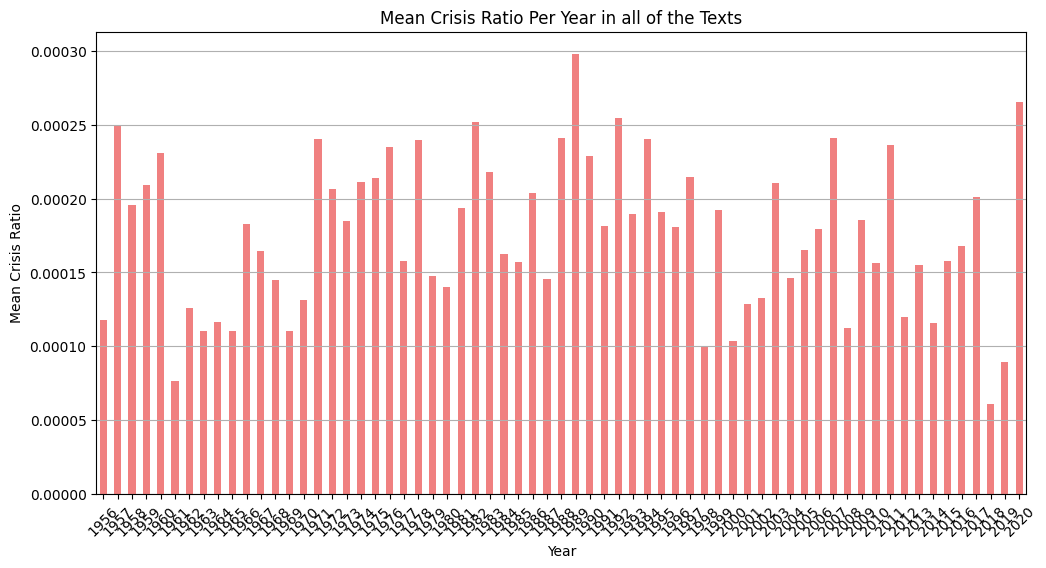

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crisis_ratio_over_time.plot(kind='bar', color='lightcoral')
plt.title('Mean Crisis Ratio Per Year in all of the Texts')
plt.xlabel('Year')
plt.ylabel('Mean Crisis Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Plotting the same graphs but by journal

these graphs Display the mean crisis ratio per year, which is the average crisis mentions per document normalized by word count.

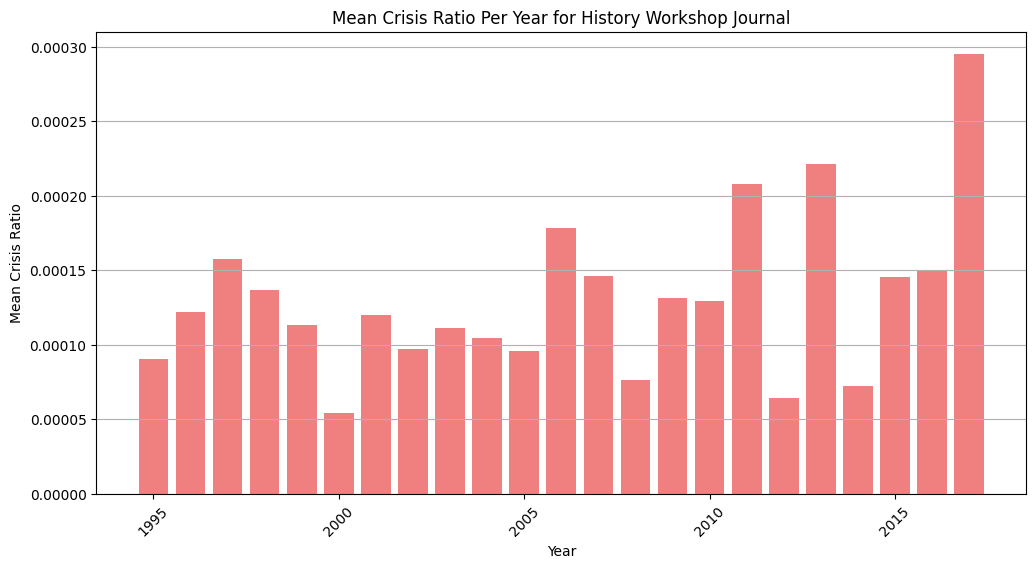

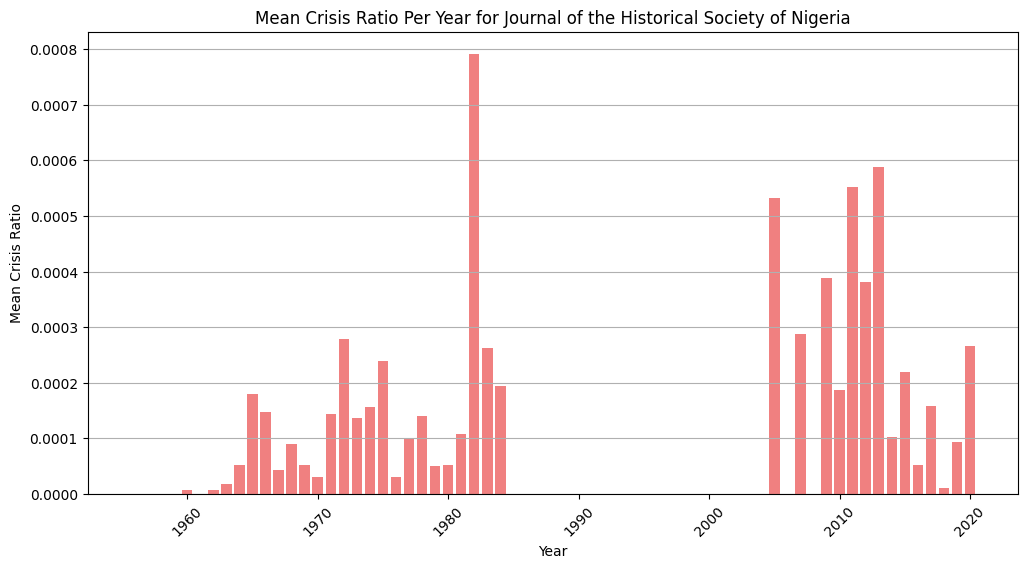

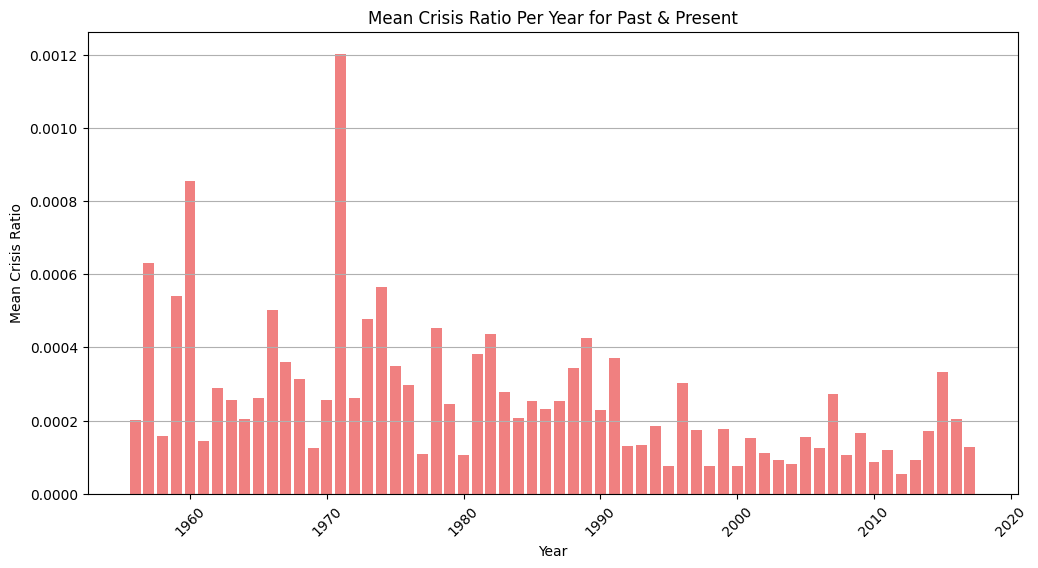

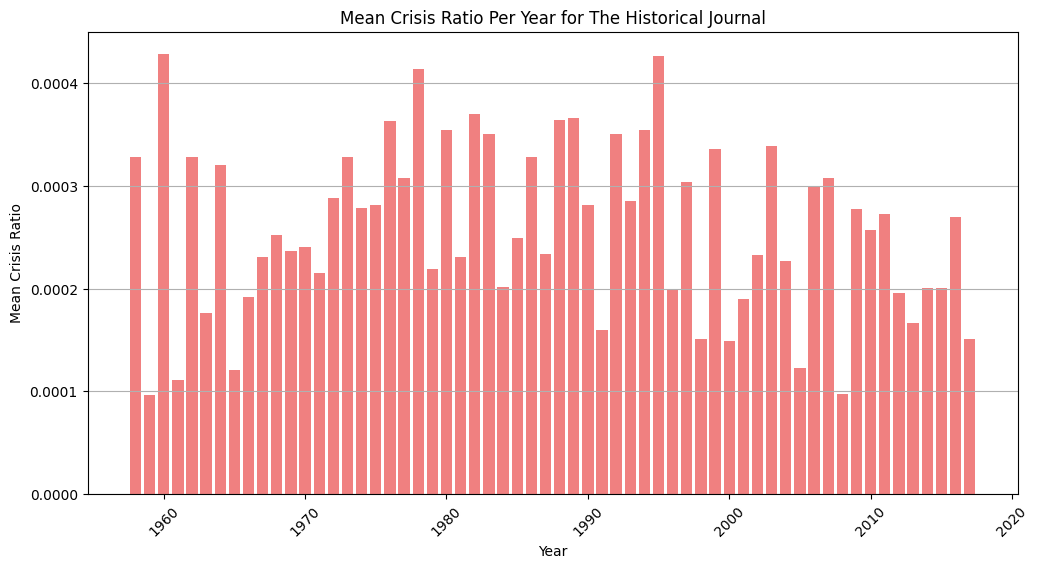

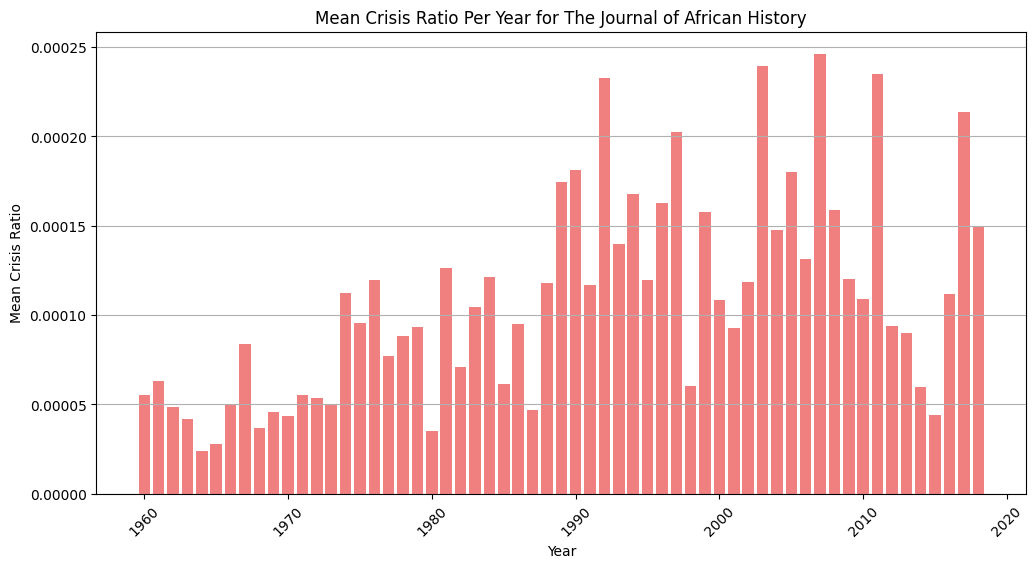

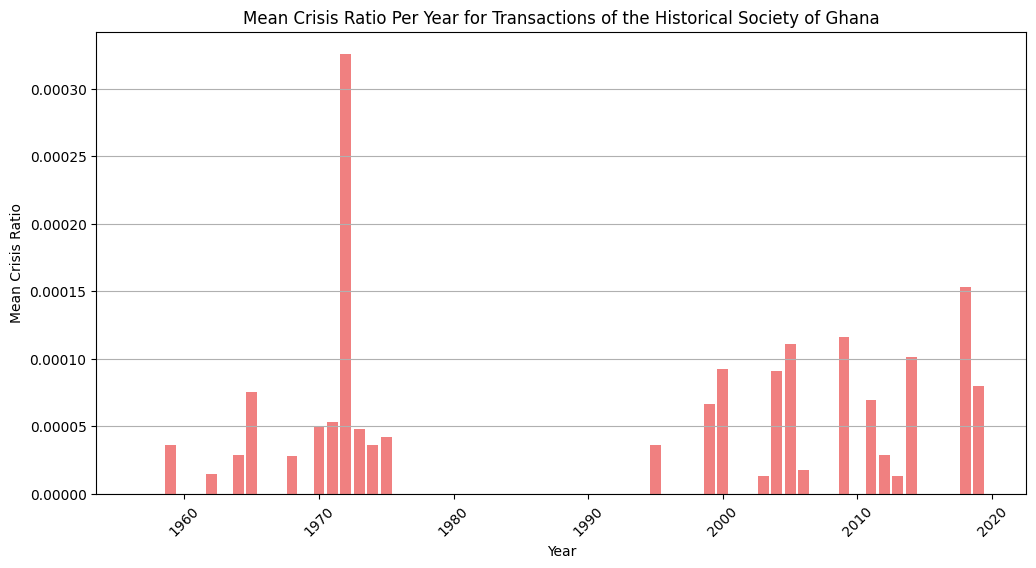

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['crisis_ratio'] = df.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by 'isPartOf' and 'publicationYear', then calculate the mean crisis ratio
crisis_ratio_by_journal = df.groupby(['isPartOf', 'publicationYear'])['crisis_ratio'].mean().reset_index()

# Plot for each journal
journals = crisis_ratio_by_journal['isPartOf'].unique()

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = crisis_ratio_by_journal[crisis_ratio_by_journal['isPartOf'] == journal]
    plt.bar(journal_data['publicationYear'], journal_data['crisis_ratio'], color='lightcoral')
    plt.title(f'Mean Crisis Ratio Per Year for {journal}')
    plt.xlabel('Year')
    plt.ylabel('Mean Crisis Ratio')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

#### These Graphs Show the overall crisis frequency, which is the total number of crisis mentions across all texts divided by the total word count for each journal and year.

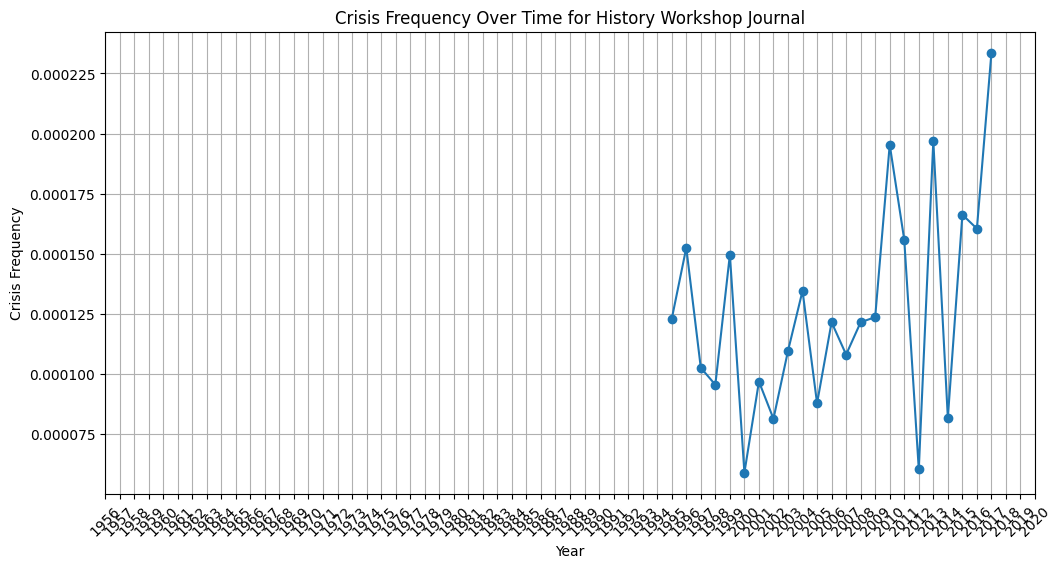

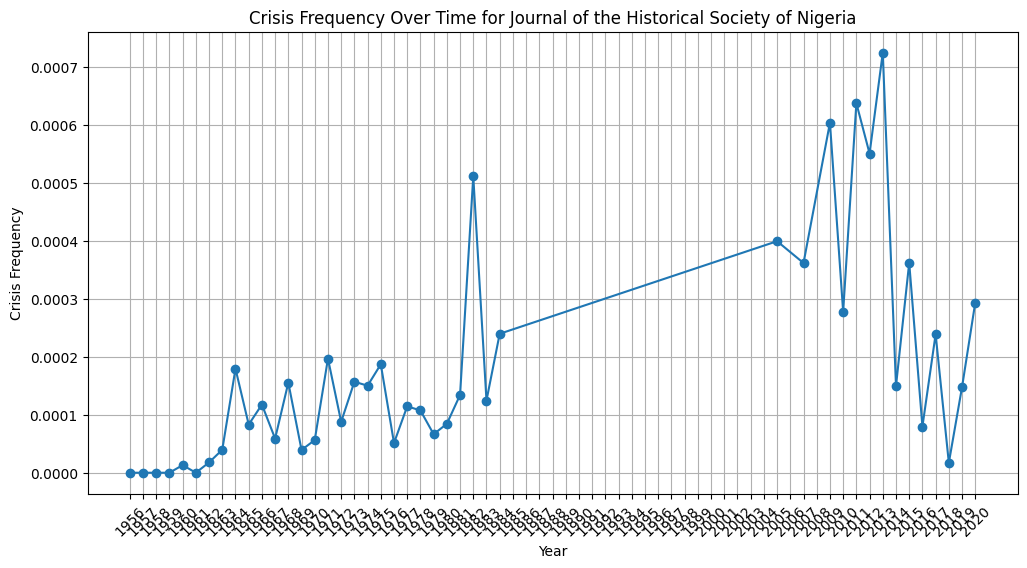

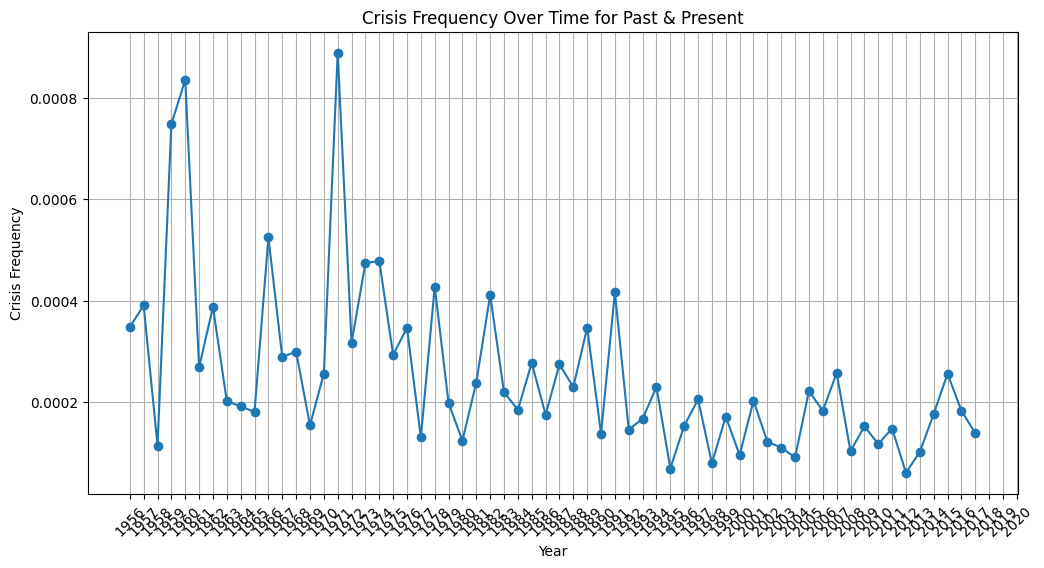

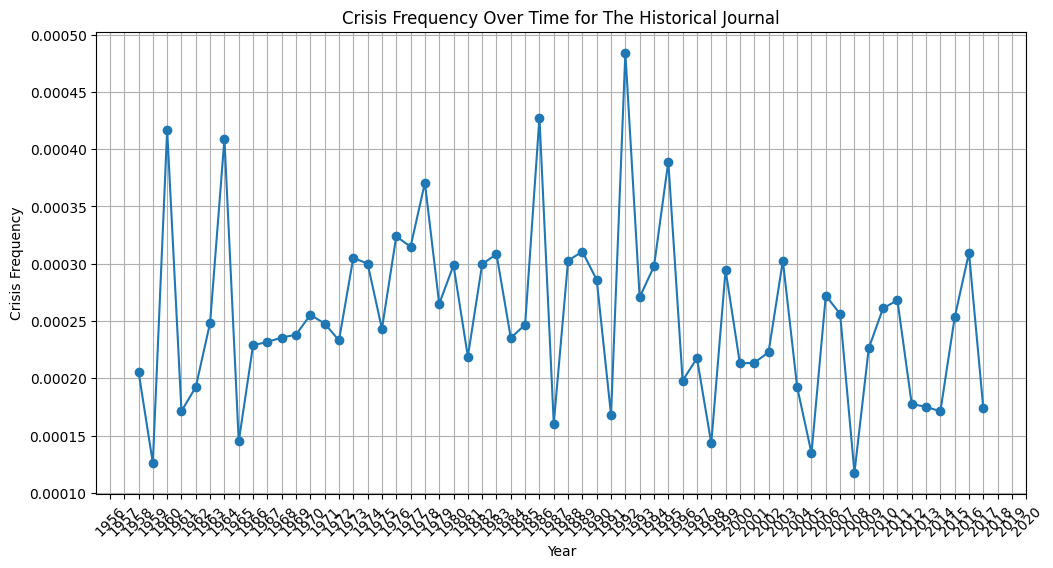

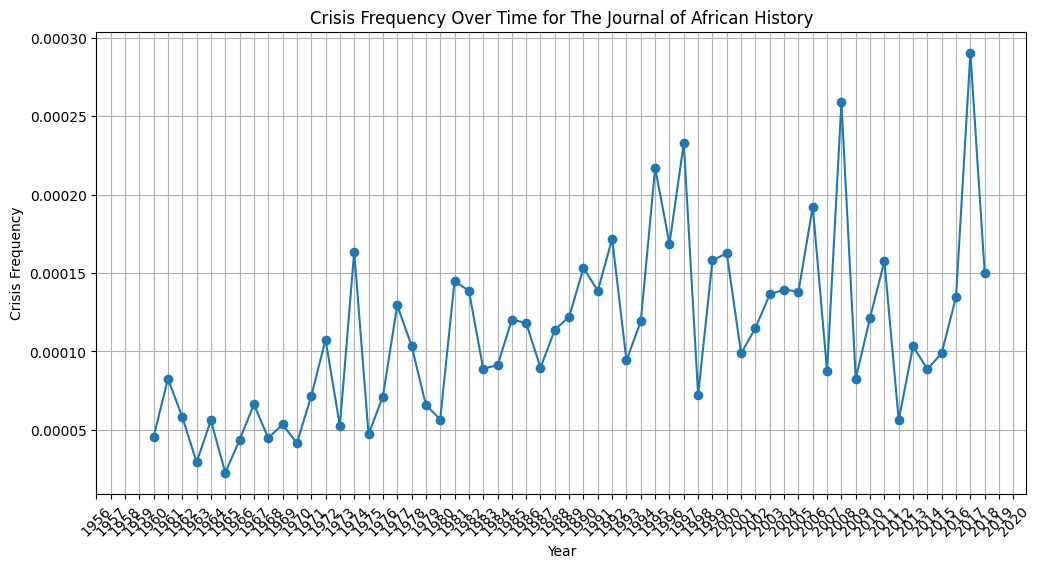

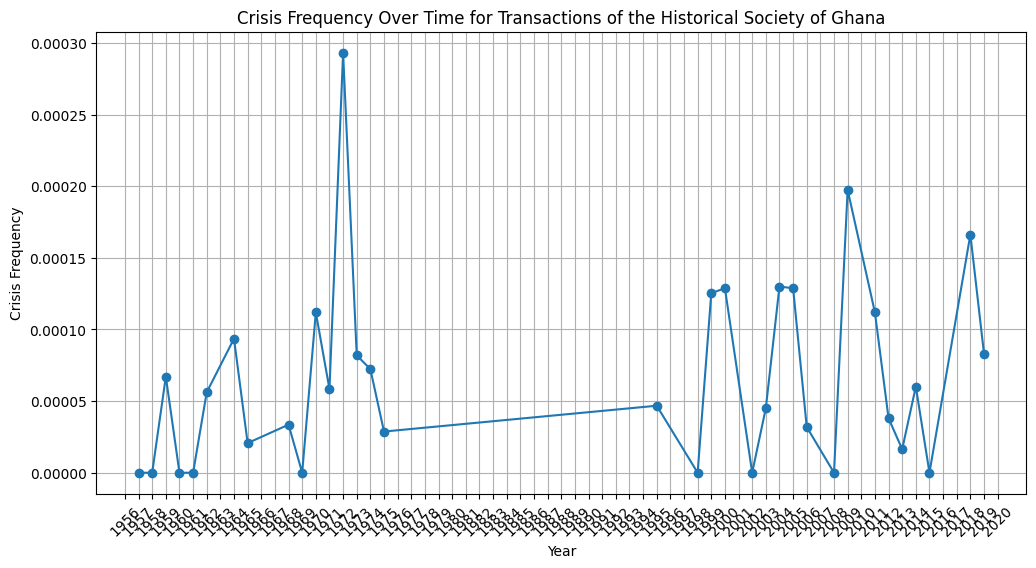

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
def calculate_crisis_frequency(text_list):
    return sum(text.lower().count('crisis') for text in text_list)

df['crisis_count'] = df['fullText'].apply(calculate_crisis_frequency)
df['total_word_count'] = df['wordCount']

grouped = df.groupby(['isPartOf', 'publicationYear']).agg({
    'crisis_count': 'sum',
    'total_word_count': 'sum'
}).reset_index()

grouped['crisis_frequency'] = grouped['crisis_count'] / grouped['total_word_count']

journals = grouped['isPartOf'].unique()
years = sorted(df['publicationYear'].unique())

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = grouped[grouped['isPartOf'] == journal]
    
    # Plot with all years on the x-axis
    plt.plot(journal_data['publicationYear'], journal_data['crisis_frequency'], marker='o', linestyle='-')
    plt.title(f'Crisis Frequency Over Time for {journal}')
    plt.xlabel('Year')
    plt.ylabel('Crisis Frequency')
    plt.xticks(years, rotation=45)  # Show all years
    plt.grid(axis='both')  # Add grid to both axes
    plt.show()


#### filtering the full texts to make the dataset only include keywords related to Africa, including countries and cities. calling them "African Related Documents"

In [39]:
import json
import pandas as pd

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

df_africa_related.head()

,datePublished,docSubType,docType,doi,fullText,id,identifier,isPartOf,issueNumber,keyphrase,language,outputFormat,pageCount,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,volumeNumber,wordCount,creator,pageEnd,pageStart,pagination,abstract
0,1993-01-01,misc,article,10.2307/183062,[I Introducing... X KRONOS: Journal of Cape Hi...,http://www.jstor.org/stable/183062,"[{'name': 'doi', 'value': '10.2307/183062'}, {...",The Journal of African History,1,"[kronos, history, hmso publicity, social histo...",[eng],"[unigrams, bigrams, trigrams]",6,jstor,1993,Cambridge University Press,"[History, History, African Studies, Area Studies]","[Social sciences - Communications, Information...",Back Matter,http://www.jstor.org/stable/183062,34,1528,NaN,NaN,NaN,NaN,NaN
1,1972-01-01,book-review,article,10.2307/180596,[LEGON HISTORY SERIES Asante and its Nezghbour...,http://www.jstor.org/stable/180596,"[{'name': 'doi', 'value': '10.2307/180596'}, {...",The Journal of African History,3,"[asante, gold coast, legon history, protest mo...",[eng],"[unigrams, bigrams, trigrams]",3,jstor,1972,Cambridge University Press,"[African Studies, Area Studies, History, History]",[Philosophy - Applied philosophy],Legon History Series,http://www.jstor.org/stable/180596,13,1355,"[R. C. C. Law, J. K. Fynn, Francis Agbodeka]",518,516,pp. 516-518,NaN
2,2004-01-01,book-review,article,10.2307/4100485,[THE WRITTEN WORD AND THE COLONIAL ENCOUNTER D...,http://www.jstor.org/stable/4100485,"[{'name': 'doi', 'value': '10.2307/4100485'}, ...",The Journal of African History,2,"[colonial, hawkins, colonial rule, northwester...",[eng],"[unigrams, bigrams, trigrams]",2,jstor,2004,Cambridge University Press,"[African Studies, Area Studies, History, History]","[History - Historical methodology, Philosophy ...",The Written Word and the Colonial Encounter,http://www.jstor.org/stable/4100485,45,1018,"[Carola Lentz, Sean Hawkins]",339,338,pp. 338-339,NaN
3,2013-01-01,book-review,article,10.2307/43305140,"[444 I VOL. 54, NO. 3 REVIEWS ROMANTICIZING TR...",http://www.jstor.org/stable/43305140,"[{'name': 'doi', 'value': '10.2307/43305140'},...",The Journal of African History,3,"[manley, travel, deborah manley, century, bett...",[eng],"[unigrams, bigrams, trigrams]",2,jstor,2013,Cambridge University Press,"[History, History, African Studies, Area Studies]",[Arts - Literature],ROMANTICIZING TRAVEL IN A TIMELESS EGYPT,http://www.jstor.org/stable/43305140,54,871,"[ANNALISE J. K. DEVRIES, Deborah Manley]",445,444,pp. 444-445,NaN
4,1992-01-01,book-review,article,10.2307/183022,[NKRUMAH IN EXILE Kwame Nkrumah: The Conakry Y...,http://www.jstor.org/stable/183022,"[{'name': 'doi', 'value': '10.2307/183022'}, {...",The Journal of African History,2,"[nkrumahs, conakry, conakry years, kwame nkrum...",[eng],"[unigrams, bigrams, trigrams]",2,jstor,1992,Cambridge University Press,"[African Studies, Area Studies, History, History]",[Philosophy - Applied philosophy],Nkrumah in Exile,http://www.jstor.org/stable/183022,33,668,"[Jean M. Allman, June Milne, Kwame Nkrumah]",346,345,pp. 345-346,NaN


#### Plotting the Mean crisis ratio of "african related documents"

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/884224851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


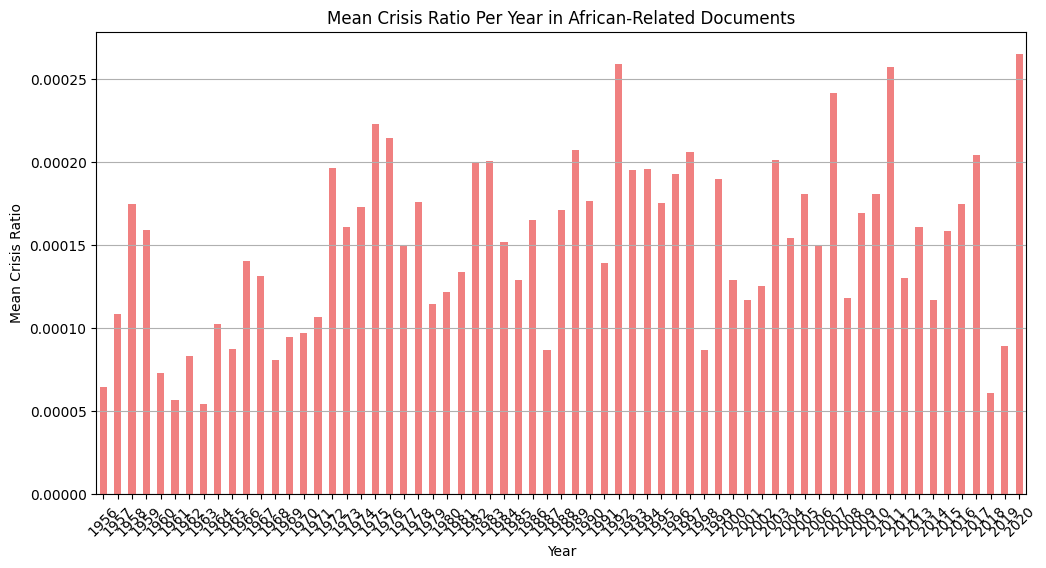

In [41]:
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

crisis_ratio_over_time = df_africa_related.groupby('publicationYear')['crisis_ratio'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
crisis_ratio_over_time.plot(kind='bar', color='lightcoral')
plt.title('Mean Crisis Ratio Per Year in African-Related Documents')
plt.xlabel('Year')
plt.ylabel('Mean Crisis Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Finding the number of "african related documents" in each journal

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3694377190.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


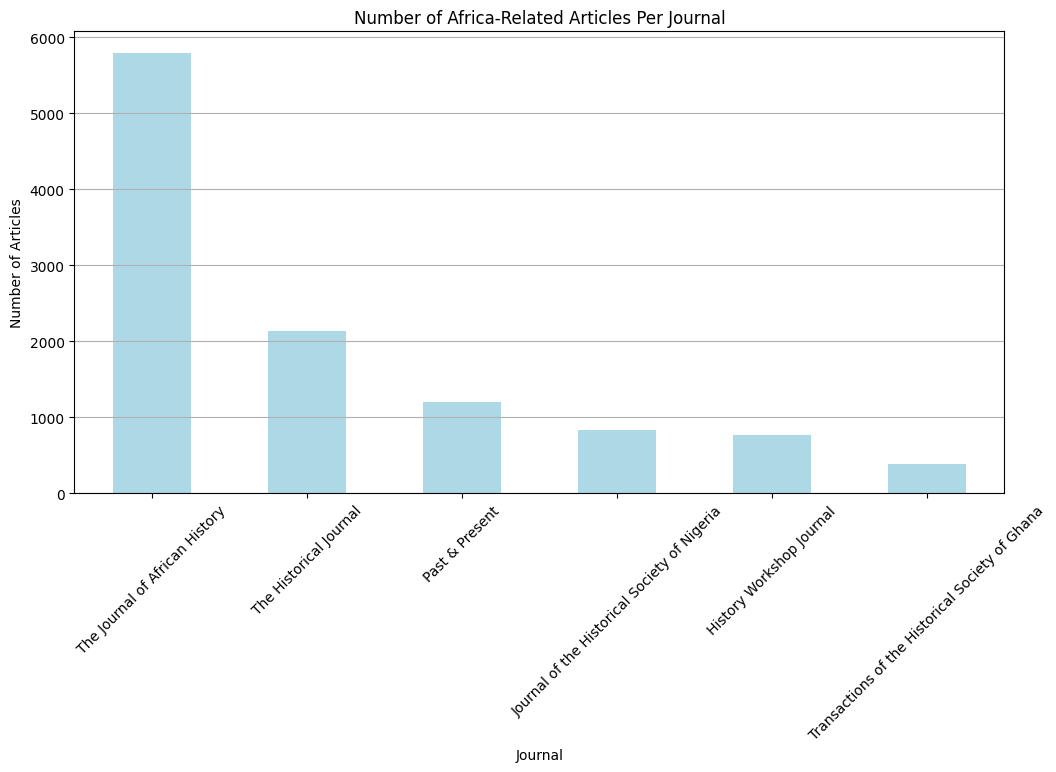

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis ratio
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by publication year for crisis ratio
crisis_ratio_over_time = df_africa_related.groupby('publicationYear')['crisis_ratio'].mean()

# Count Africa-related articles per journal
journal_counts = df_africa_related['isPartOf'].value_counts()

plt.figure(figsize=(12, 6))
journal_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Africa-Related Articles Per Journal')
plt.xlabel('Journal')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Finding this as a percentage of all documents that are "african related"

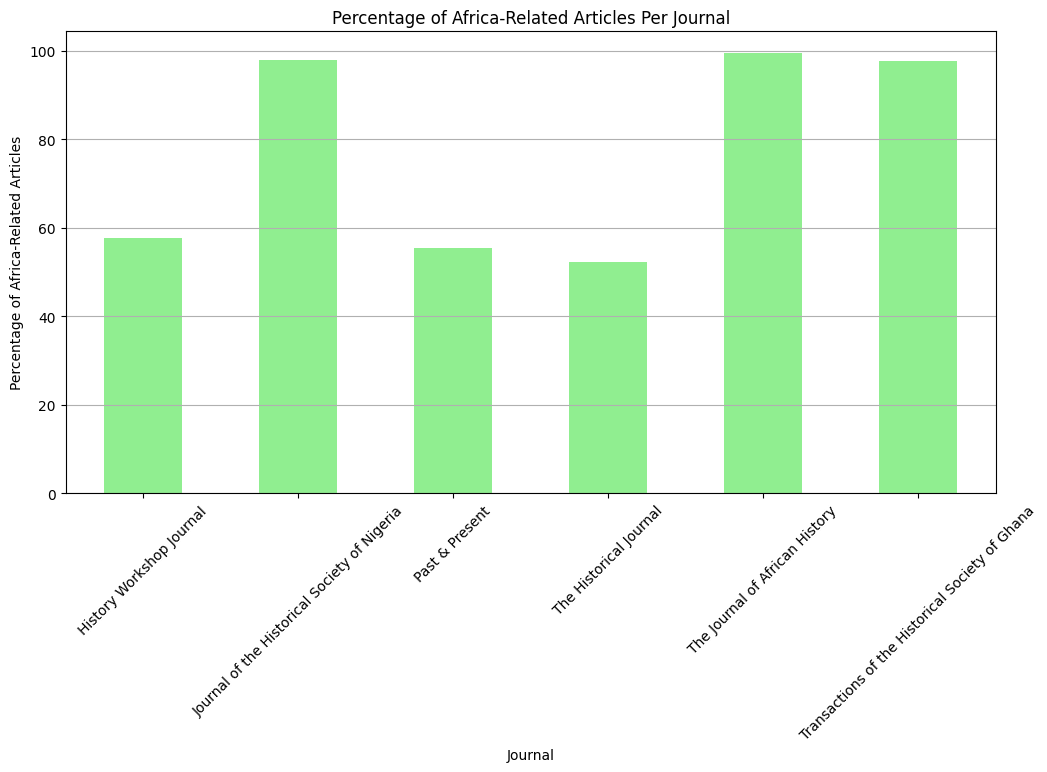

In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

file_path = "part-1.jsonl"

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Count total articles per journal
total_journal_counts = df['isPartOf'].value_counts()

# Count Africa-related articles per journal
africa_journal_counts = df_africa_related['isPartOf'].value_counts()

# Calculate percentage of Africa-related articles
percentage_africa_related = (africa_journal_counts / total_journal_counts * 100).fillna(0)

# Plot percentage of Africa-related articles
plt.figure(figsize=(12, 6))
percentage_africa_related.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Africa-Related Articles Per Journal')
plt.xlabel('Journal')
plt.ylabel('Percentage of Africa-Related Articles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3033338858.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_ratio'] = df_africa_related.apply(


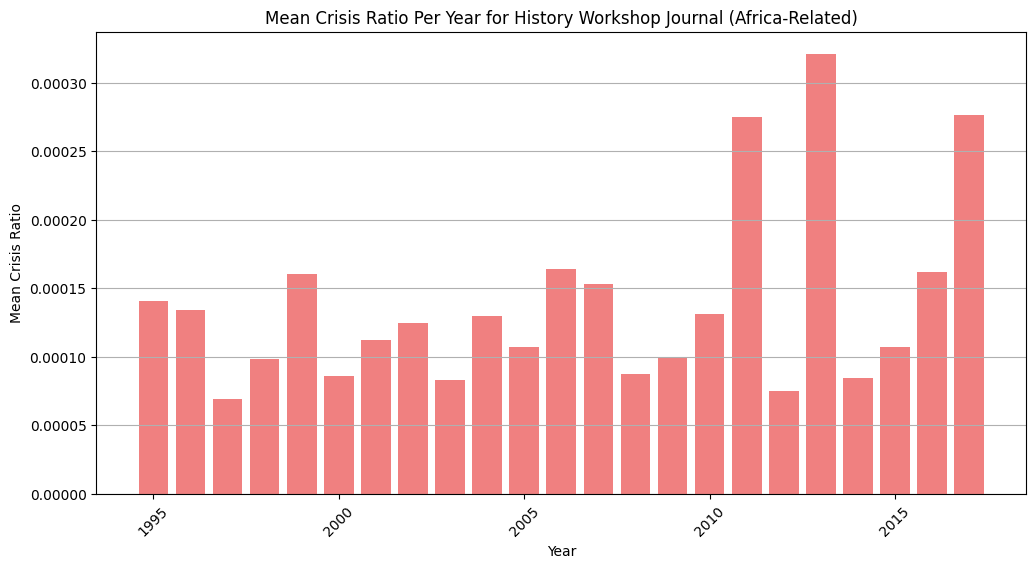

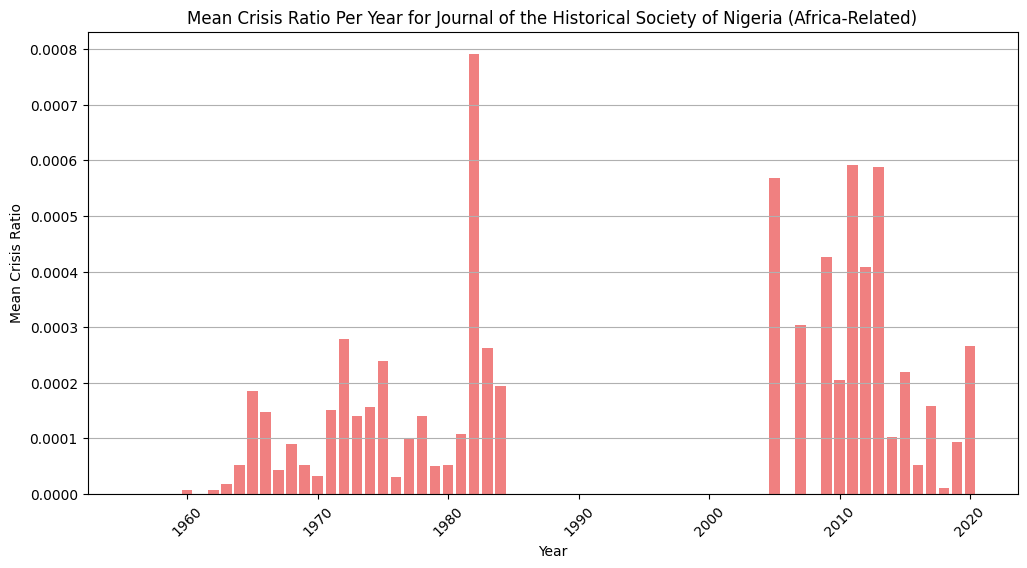

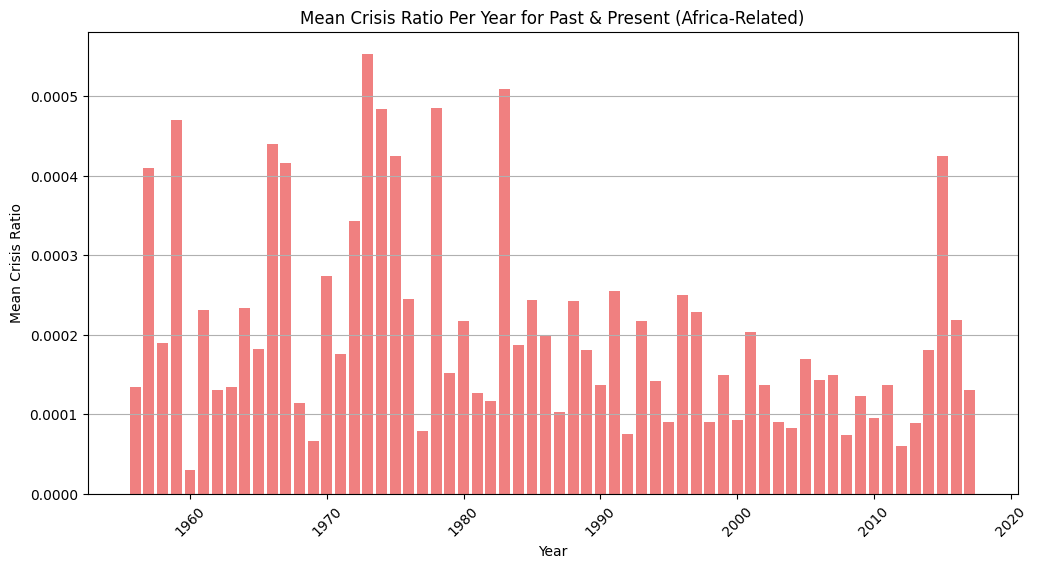

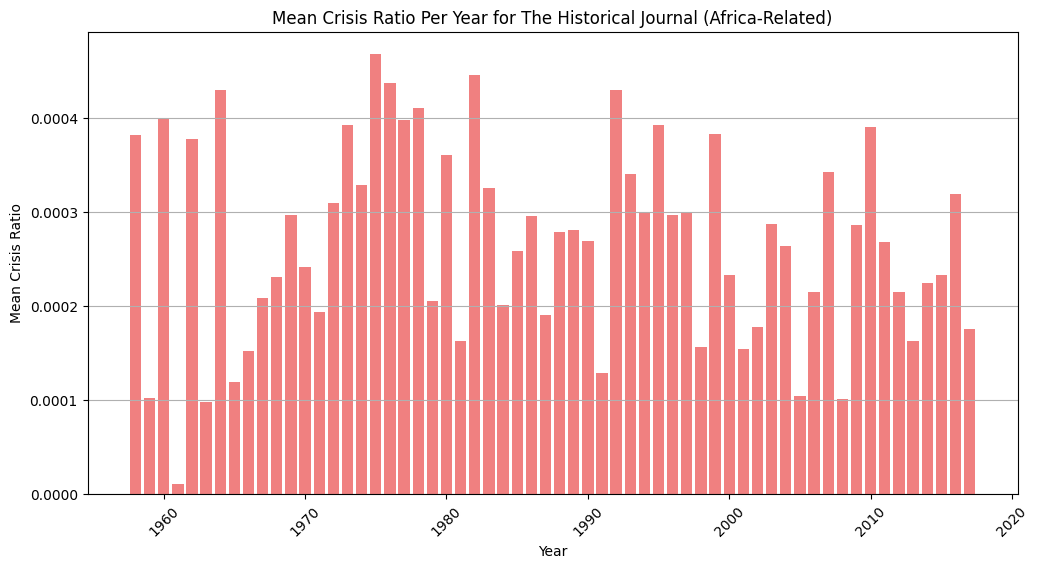

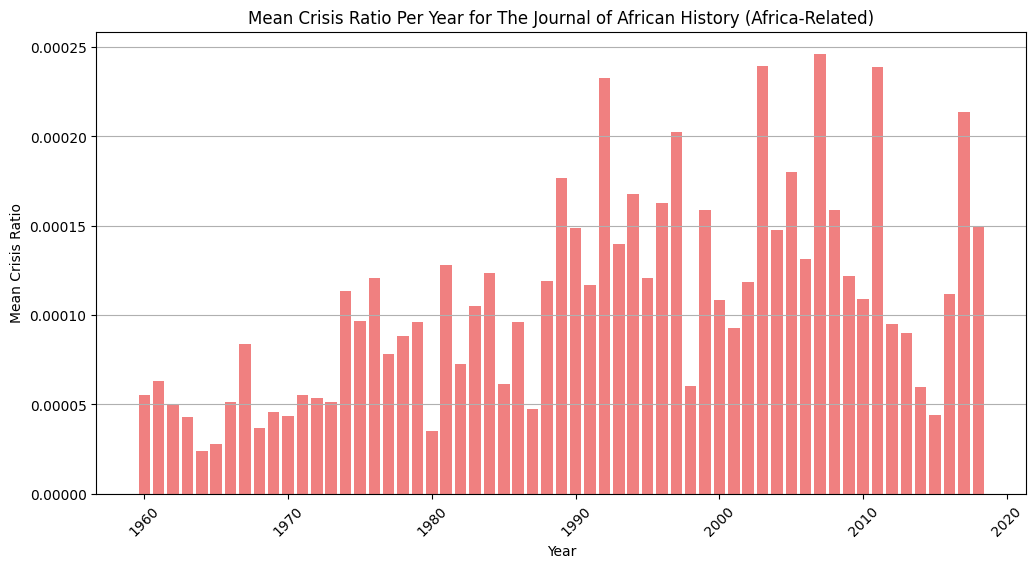

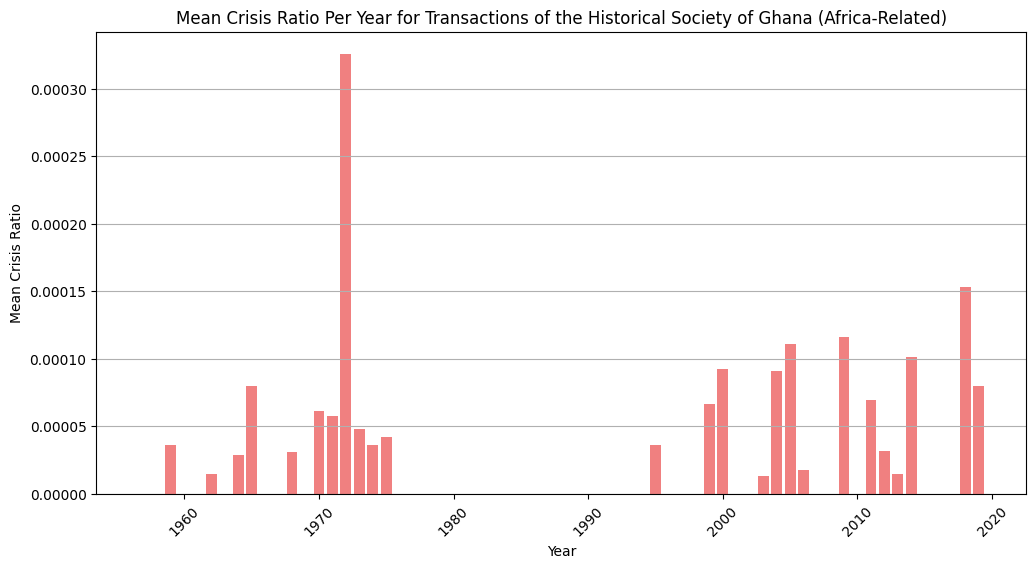

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis ratio for Africa-related articles
df_africa_related['crisis_ratio'] = df_africa_related.apply(
    lambda row: calculate_crisis_ratio(row['fullText'], row['wordCount']),
    axis=1
)

# Group by 'isPartOf' and 'publicationYear', then calculate the mean crisis ratio
crisis_ratio_by_journal = df_africa_related.groupby(['isPartOf', 'publicationYear'])['crisis_ratio'].mean().reset_index()

# Plot for each journal
journals = crisis_ratio_by_journal['isPartOf'].unique()

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = crisis_ratio_by_journal[crisis_ratio_by_journal['isPartOf'] == journal]
    plt.bar(journal_data['publicationYear'], journal_data['crisis_ratio'], color='lightcoral')
    plt.title(f'Mean Crisis Ratio Per Year for {journal} (Africa-Related)')
    plt.xlabel('Year')
    plt.ylabel('Mean Crisis Ratio')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3210453229.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['crisis_count'] = df_africa_related['fullText'].apply(calculate_crisis_frequency)
/var/folders/vl/gw6_4khj6fs112yqn_t18g680000gp/T/ipykernel_48786/3210453229.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa_related['total_word_count'] = df_africa_related['wordCount']


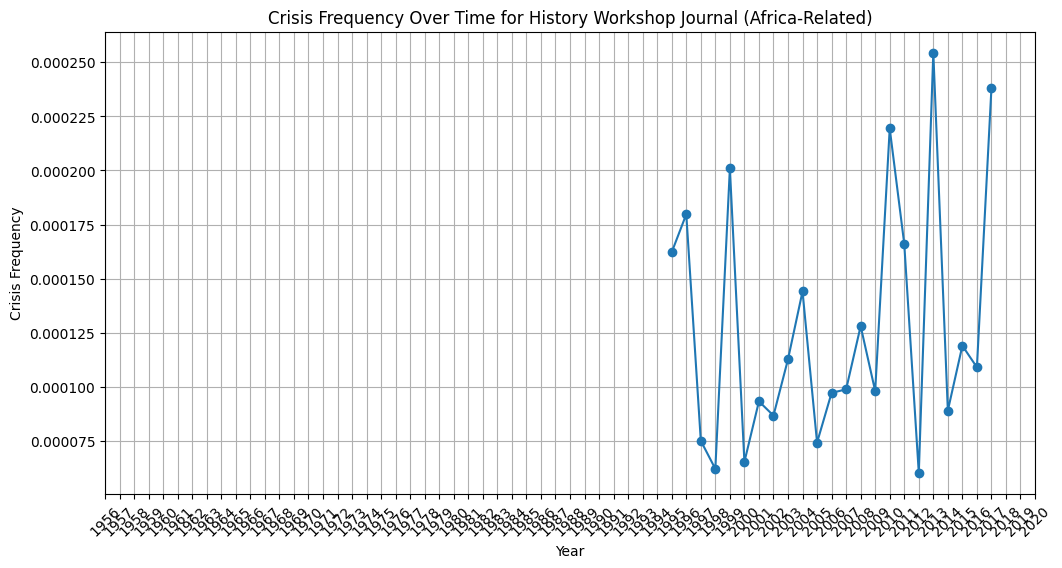

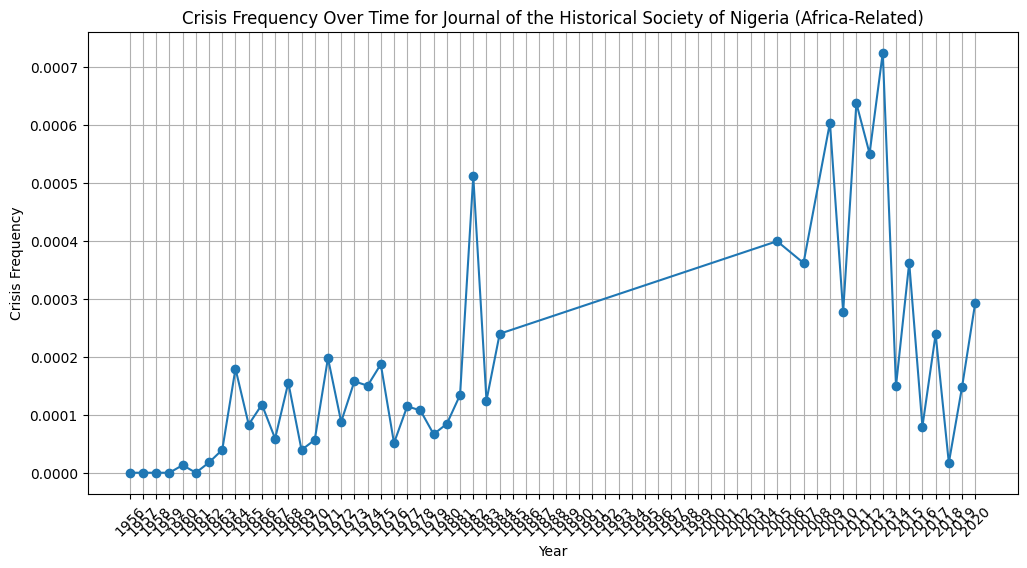

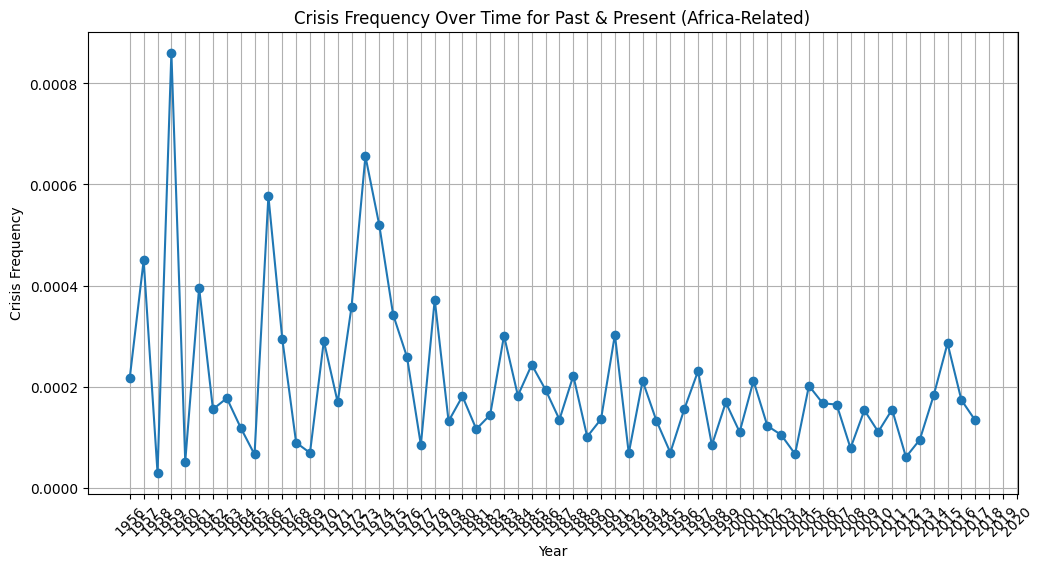

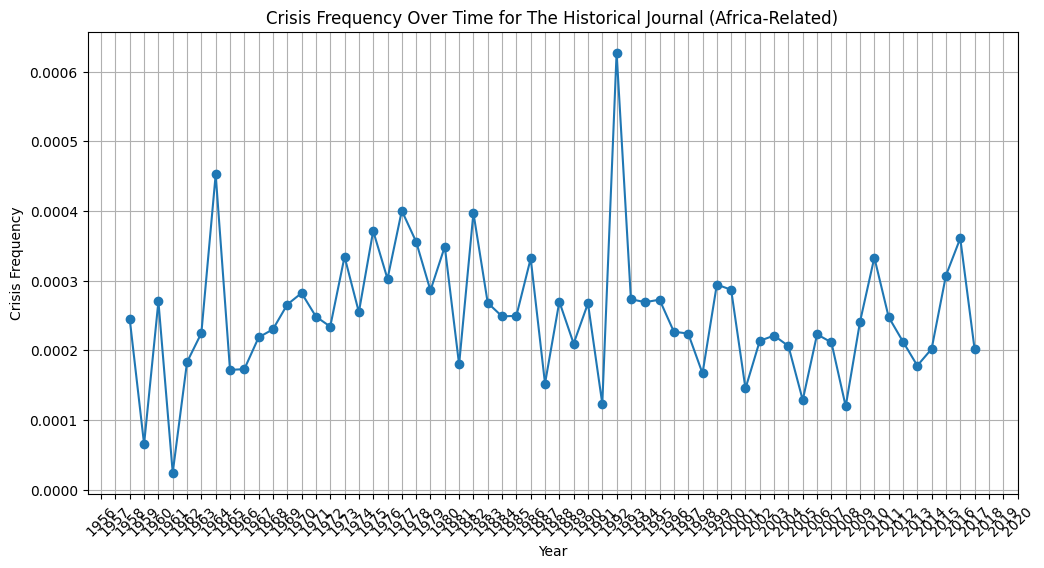

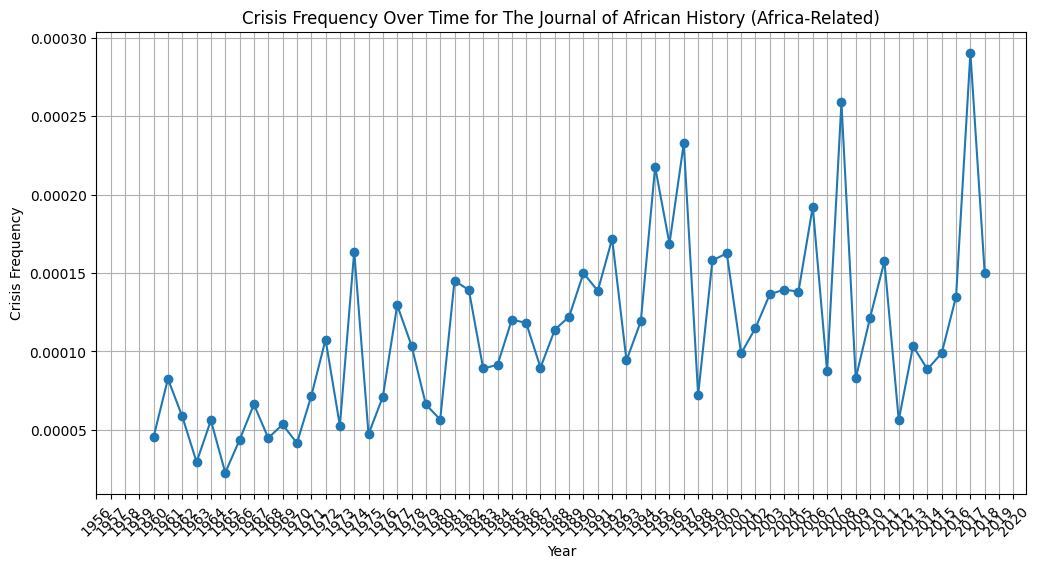

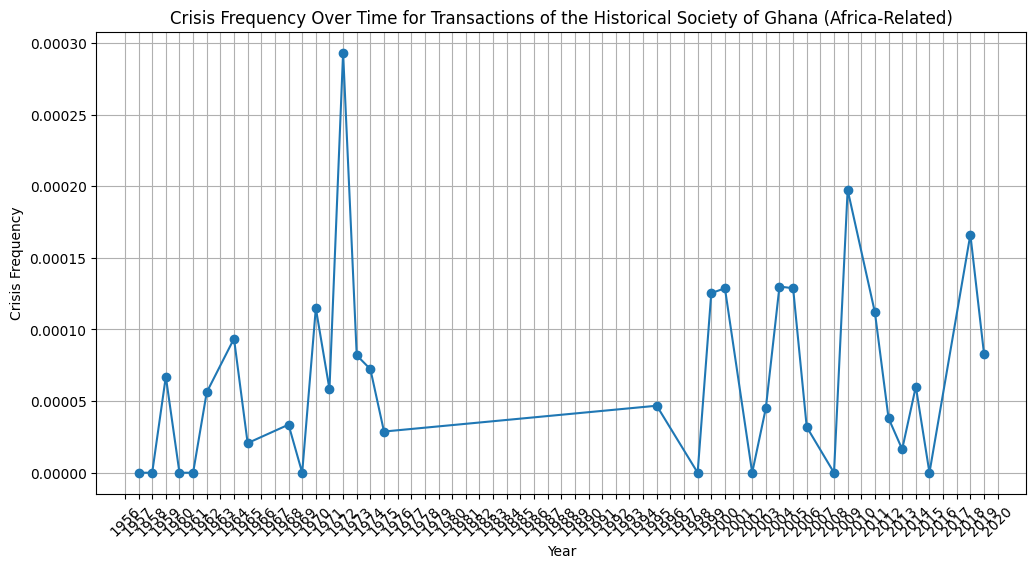

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

africa_keywords = [
    'africa', 'nigeria', 'kenya', 'ghana', 'egypt', 'south africa', 'cairo',
    'lagos', 'nairobi', 'accra', 'johannesburg', 'algeria', 'morocco', 'tanzania',
    'uganda', 'ethiopia', 'zambia', 'zimbabwe', 'senegal', 'tunisia', 'sudan',
    'angola', 'cameroon', 'ivory coast', 'madagascar', 'mozambique', 'rwanda',
    'libya', 'mali', 'malawi', 'botswana', 'namibia', 'burundi', 'chad',
    'congo', 'drc', 'eritrea', 'gabon', 'gambia', 'guinea', 'lesotho',
    'liberia', 'mauritania', 'mauritius', 'niger', 'seychelles', 'sierra leone',
    'somalia', 'eswatini', 'togo', 'benin', 'burkina faso', 'cape verde',
    'comoros', 'djibouti', 'equatorial guinea', 'western sahara'
]

# Filter rows containing Africa-related keywords in 'fullText'
df_africa_related = df[
    df['fullText'].apply(lambda text_list: any(keyword in ' '.join(text_list).lower() for keyword in africa_keywords))
]

# Calculate crisis frequency for Africa-related articles
df_africa_related['crisis_count'] = df_africa_related['fullText'].apply(calculate_crisis_frequency)
df_africa_related['total_word_count'] = df_africa_related['wordCount']

grouped = df_africa_related.groupby(['isPartOf', 'publicationYear']).agg({
    'crisis_count': 'sum',
    'total_word_count': 'sum'
}).reset_index()

grouped['crisis_frequency'] = grouped['crisis_count'] / grouped['total_word_count']

journals = grouped['isPartOf'].unique()
years = sorted(df_africa_related['publicationYear'].unique())

for journal in journals:
    plt.figure(figsize=(12, 6))
    journal_data = grouped[grouped['isPartOf'] == journal]
    
    # Plot with all years on the x-axis
    plt.plot(journal_data['publicationYear'], journal_data['crisis_frequency'], marker='o', linestyle='-')
    plt.title(f'Crisis Frequency Over Time for {journal} (Africa-Related)')
    plt.xlabel('Year')
    plt.ylabel('Crisis Frequency')
    plt.xticks(years, rotation=45)  # Show all years
    plt.grid(axis='both')  # Add grid to both axes
    plt.show()